In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_munich_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('munich')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/munich_{date}.csv',index=False)
get_listings_munich_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_munich = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_munich)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(munich_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 4914 AirBnb listings.


In [4]:
munich_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2020-12.csv')
munich_raw_df_12_12_2020.shape


(4815, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for munich
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_munich = glob.glob('munich/**.csv')
files_munich

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['munich/Munich_2021-10.csv',
 'munich/Munich_2021-04.csv',
 'munich/Munich_2021-07.csv',
 'munich/Munich_2021-06.csv',
 'munich/Munich_2021-02.csv',
 'munich/Munich_2021-03.csv',
 'munich/Munich_2021-01.csv',
 'munich/Munich_2021-08.csv',
 'munich/Munich_2021-09.csv',
 'munich/Munich_2020-12.csv',
 'munich/Munich_2020-11.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

munich_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(munich_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(munich_raw_df_12_12_2020['price'].mean(),2)}.")

munich_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(munich_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_1_9_2021['price'].mean(),2)}.")

munich_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(munich_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_2_8_2021['price'].mean(),2)}.")

munich_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(munich_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_3_4_2021['price'].mean(),2)}.")

munich_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(munich_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_4_9_2021['price'].mean(),2)}.")

#munich_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(munich_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_5_19_2021['price'].mean(),2)}.")

munich_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(munich_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_6_3_2021['price'].mean(),2)}.")

munich_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(munich_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_7_4_2021['price'].mean(),2)}.")

munich_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(munich_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_8_6_2021['price'].mean(),2)}.")

munich_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(munich_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_9_7_2021['price'].mean(),2)}.")

munich_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(munich_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_10_6_2021['price'].mean(),2)}.")

#munich_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(munich_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 4815 AirBnb listings; the avg price is €113.06.
The 1_9_2021 dataset contains 5106 AirBnb listings; the avg price is €112.5.
The 2_8_2021 dataset contains 5126 AirBnb listings; the avg price is €112.06.
The 3_4_2021 dataset contains 5073 AirBnb listings; the avg price is €113.46.
The 4_9_2021 dataset contains 5103 AirBnb listings; the avg price is €114.77.
The 6_3_2021 dataset contains 5039 AirBnb listings; the avg price is €118.55.
The 7_4_2021 dataset contains 5098 AirBnb listings; the avg price is €116.98.
The 8_6_2021 dataset contains 5115 AirBnb listings; the avg price is €118.56.
The 9_7_2021 dataset contains 4964 AirBnb listings; the avg price is €125.17.
The 10_6_2021 dataset contains 4914 AirBnb listings; the avg price is €120.75.


In [7]:
df_list_munich = [munich_raw_df_12_12_2020, munich_raw_df_1_9_2021, munich_raw_df_2_8_2021,
           munich_raw_df_3_4_2021, munich_raw_df_4_9_2021, munich_raw_df_6_3_2021, munich_raw_df_7_4_2021,
           munich_raw_df_8_6_2021, munich_raw_df_9_7_2021, munich_raw_df_10_6_2021]

dates_munich = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_munich = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_munich = []

def airbnb_parse_munich(df_list, files):
    for file in files_munich:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/munich/munich_{file}.csv")
        print(f"The {file} munich dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_munich(df_list, dates):
    for file in files_munich:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/munich/munich_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_munich.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_munich)

munich_parse = airbnb_parse_munich(df_list_munich, files_munich)


The 2020-12 munich dataset contains 4815 AirBnb listings -- the avg price is €113.06.
The 2021-01 munich dataset contains 5106 AirBnb listings -- the avg price is €112.5.
The 2021-02 munich dataset contains 5126 AirBnb listings -- the avg price is €112.06.
The 2021-03 munich dataset contains 5073 AirBnb listings -- the avg price is €113.46.
The 2021-04 munich dataset contains 5103 AirBnb listings -- the avg price is €114.77.
The 2021-06 munich dataset contains 5039 AirBnb listings -- the avg price is €118.55.
The 2021-07 munich dataset contains 5098 AirBnb listings -- the avg price is €116.98.
The 2021-08 munich dataset contains 5115 AirBnb listings -- the avg price is €118.56.
The 2021-09 munich dataset contains 4964 AirBnb listings -- the avg price is €125.17.
The 2021-10 munich dataset contains 4914 AirBnb listings -- the avg price is €120.75.


In [8]:
munich_summary = airbnb_to_frame_munich(df_list_munich, files_munich)
munich_summary['Date of scrape'] = pd.to_datetime(munich_summary['Date of scrape'])
munich_summary['City'] = 'Munich'

dfi.export(munich_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/airbnb_munich_summary.png")


In [9]:
master_df_munich = pd.concat(df_list_munich)
master_df_munich_unique = master_df_munich.drop_duplicates(subset='id')
master_df_munich_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,130,2019-10-03,1.18,2,5,NaN,NaN
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,2,53,2019-10-06,0.46,2,52,NaN,NaN
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,99,2,93,2020-10-20,0.80,1,9,NaN,NaN
3,170815,Your own flat near central station!,814793,Inge,NaN,Neuhausen-Nymphenburg,48.16132,11.54154,Entire home/apt,65,3,64,2020-02-18,0.56,1,0,NaN,NaN
4,171749,1min to subway - Wettersteinplatz,819382,Tarek,NaN,Untergiesing-Harlaching,48.10583,11.57843,Private room,37,3,357,2020-12-04,3.12,1,85,NaN,NaN


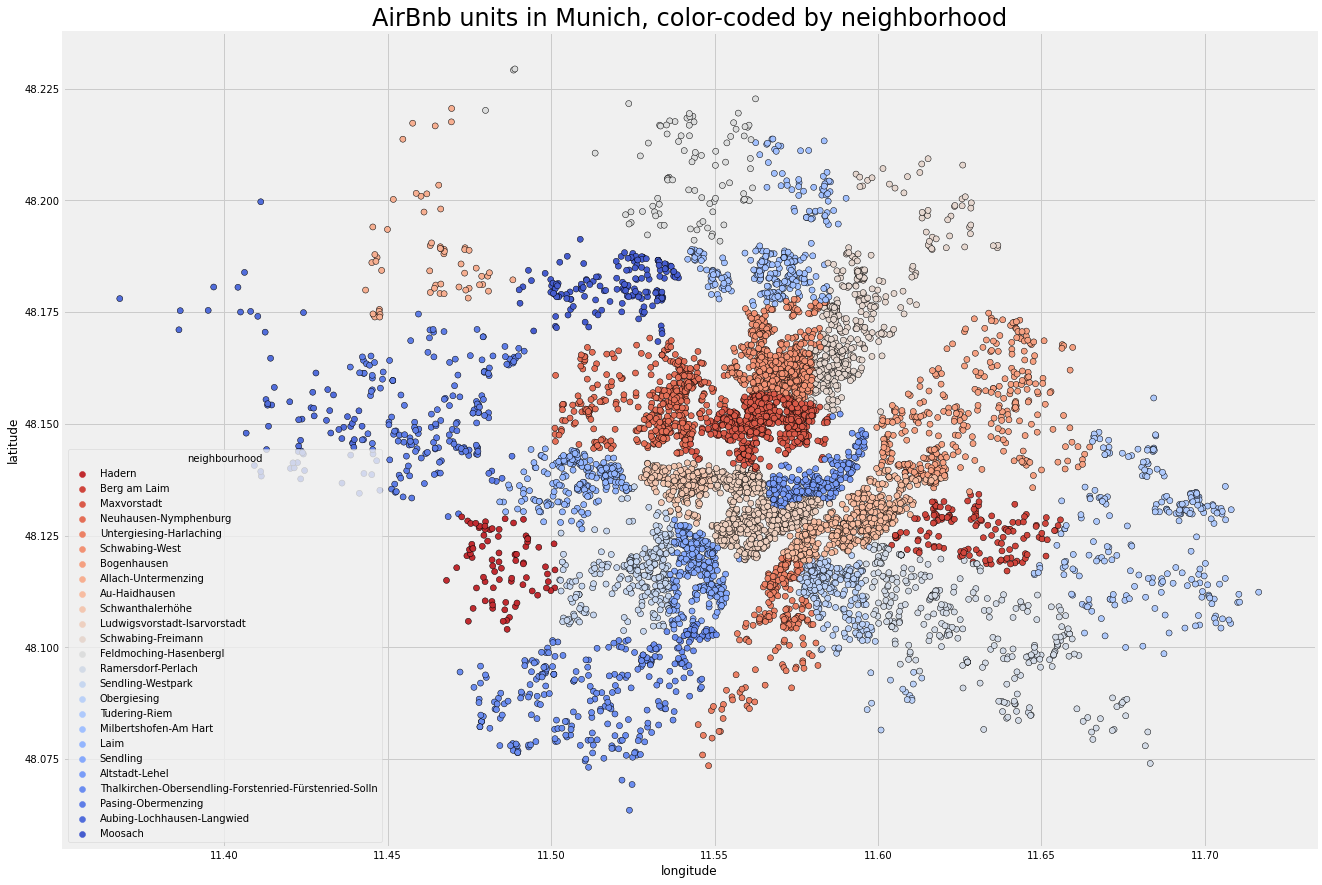

In [10]:
title = 'AirBnb units in Munich, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_munich_unique.longitude, master_df_munich_unique.latitude, hue = master_df_munich_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/airbnb_munich_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([munich_raw_df_10_6_2021,raw_df_munich],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    2512
4     785
1     700
3     508
5     146
6     139
0       4
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -152.25004253773636
Coefficients:  [ 28.08028281   4.68498956   6.66137531   0.59878976   2.0084467
   2.18719384  21.77686243  46.85970806 -41.57772845]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


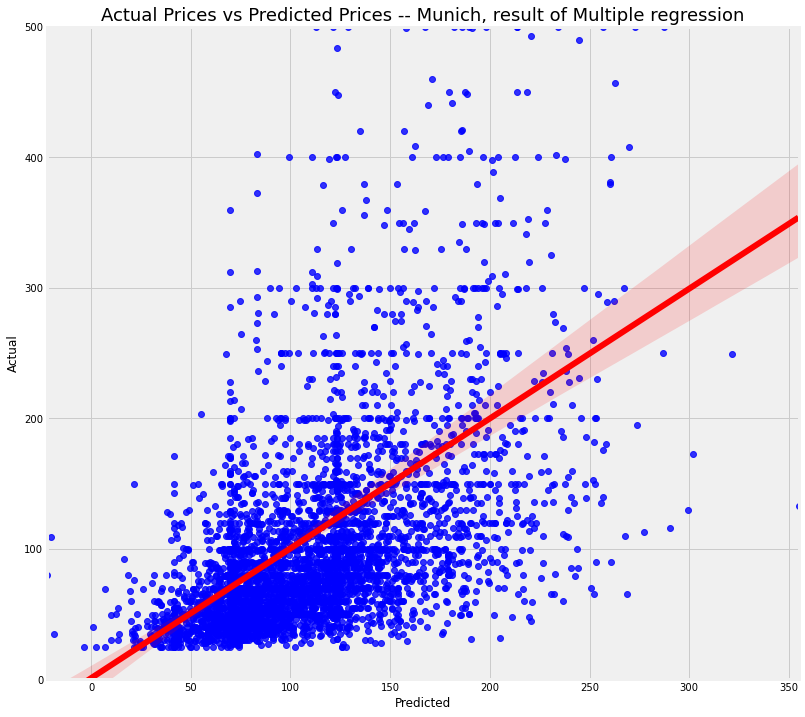

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Munich, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/airbnb_munich_multiple_regression.png')



In [18]:
df_result.shape

(4166, 3)

## The most mispriced [undervalued]

In [19]:
munich_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
munich_mispriced['%'] = (munich_mispriced['Actual']/ munich_mispriced['Predicted'] -1) *100
munich_mispriced_perc = munich_mispriced.sort_values(by=['%'], ascending=True)
munich_mispriced_perc_plot = munich_mispriced_perc.loc[(munich_mispriced_perc['Predicted']>=1) & (munich_mispriced_perc['Diff']>= 1)]
munich_mispriced_perc_plot = munich_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
munich_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
2513,32,205.224176,173.224176,-84.407295
449,31,190.755510,159.755510,-83.748831
3687,29,158.365668,129.365668,-81.687950
4837,28,145.473412,117.473412,-80.752497
3476,25,127.737578,102.737578,-80.428625


In [20]:

munich_mispriced_1 = raw_df_munich.loc[raw_df_munich.id==827]
munich_mispriced_2 = raw_df_munich.loc[raw_df_munich.id==748]
munich_mispriced_3 = raw_df_munich.loc[raw_df_munich.index==1308]
munich_mispriced_4 = raw_df_munich.loc[raw_df_munich.index==1748]
munich_mispriced_5 = raw_df_munich.loc[raw_df_munich.index==894]

In [21]:
id_array = [2513, 449, 3687, 4837, 3476]

munich_mispriced_query = raw_df_munich.query('index in @id_array')
munich_mispriced_query = munich_mispriced_query.rename({'index': 'id'}, axis=1)
munich_mispriced_query.shape
#munich_mispriced_query.head(1)

(5, 74)

In [22]:
#munich_mispriced_neg = raw_df_munich.loc[raw_df_munich.index==4119]
munich_mispriced_perc_1 = raw_df_munich.loc[raw_df_munich.id==7125]
munich_mispriced_perc_2 = raw_df_munich.loc[raw_df_munich.id==3679]
munich_mispriced_perc_3 = raw_df_munich.loc[raw_df_munich.id==8267]
munich_mispriced_perc_4 = raw_df_munich.loc[raw_df_munich.id==2483]
munich_mispriced_perc_5 = raw_df_munich.loc[raw_df_munich.id==3449]

In [23]:
munich_mispriced = munich_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
munich_mispriced_1 = munich_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

munich_mispriced_1[:1]
munich_mispriced_1[:2]
munich_mispriced_1[:3]
munich_mispriced_1[:4]
munich_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
449,4193194,$31.00,4.57,4.74,4.58,4.86,4.78,4.70,"Munich, Bavaria, Germany",https://www.airbnb.com/rooms/4193194
2513,33635514,$32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/33635514
3476,40696784,$25.00,4.91,4.82,5.00,5.00,4.91,4.64,"Munich, Bayern, Germany",https://www.airbnb.com/rooms/40696784
3687,43053064,$29.00,5.00,5.00,5.00,5.00,5.00,5.00,"Munich, Bayern, Germany",https://www.airbnb.com/rooms/43053064
4837,52662829,$28.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/52662829


In [24]:
dfi.export(munich_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/airbnb_munich_mispriced.png")



## The best score

In [25]:
munich_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
munich_high_value.head(6)

,Actual,Predicted,Diff
3684,133,354.814208,221.814208
3700,249,321.529005,72.529005
3796,600,306.220124,-293.779876
428,173,302.065230,129.065230
4659,130,299.577454,169.577454
4347,116,290.347908,174.347908


In [27]:
id_array = [3684, 3700, 3796, 428, 4659]

munich_best_score_query = raw_df_munich.query('index in @id_array')
munich_best_score_query = munich_best_score_query.rename({'index': 'id'}, axis=1)
#munich_best_score_query.head(1)

In [28]:
munich_best_score = munich_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
munich_best_score_1 = munich_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

munich_best_score_1[:1]
munich_best_score_1[:2]
munich_best_score_1[:3]
munich_best_score_1[:4]
munich_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
428,4105119,$173.00,4.50,4.50,5.00,5.00,5.00,3.00,"Munich, Bavaria, Germany",https://www.airbnb.com/rooms/4105119
3684,43033879,$133.00,4.46,4.86,4.71,4.71,4.50,4.68,"Munich, Bayern, Germany",https://www.airbnb.com/rooms/43033879
3700,43122181,$249.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/43122181
3796,43905484,$600.00,4.87,4.93,4.87,4.93,4.93,4.80,NaN,https://www.airbnb.com/rooms/43905484
4659,51578816,$130.00,2.00,4.00,1.00,1.00,5.00,2.00,NaN,https://www.airbnb.com/rooms/51578816


In [29]:
dfi.export(munich_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/airbnb_munich_best_score.png")


